In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
import statsmodels
import scipy
import plotly.express as px
import plotly.graph_objects as go
import dash
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

In [2]:
pd.set_option('display.max_columns', 100)
%matplotlib inline
sns.set_style()
pd.set_option('display.max_columns', 1000)
plt.rcParams["figure.figsize"] = (15,8)
# rc = {
#     # "axes.facecolor": "#FFF9ED",
#     "axes.edgecolor": "#000000",
#     "grid.color": "#EBEBE7",
#     "axes.labelcolor": "#000000",
#     "xtick.color": "#000000",
#     "ytick.color": "#000000",
#     "grid.alpha": 0.4,
    
# }
plt.style.use('fivethirtyeight')
sns.despine()

<Figure size 1500x800 with 0 Axes>

# Importing Data

In [3]:
path = gplt.datasets.get_path('world')
world = gpd.read_file(path)

In [4]:
!kaggle datasets download -d nelgiriyewithana/billionaires-statistics-dataset 
import zipfile
with zipfile.ZipFile('billionaires-statistics-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall()

billionaires-statistics-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [28]:
data = pd.read_csv('Billionaires Statistics Dataset.csv')
data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


# EDA

## Billionaires per Countries

In [6]:
countryCount = data.groupby('countryOfCitizenship')['rank'].count()
countryCount = countryCount.reset_index().sort_values('rank', ascending=False)

Text(0.5, 0, 'Number of billionaires')

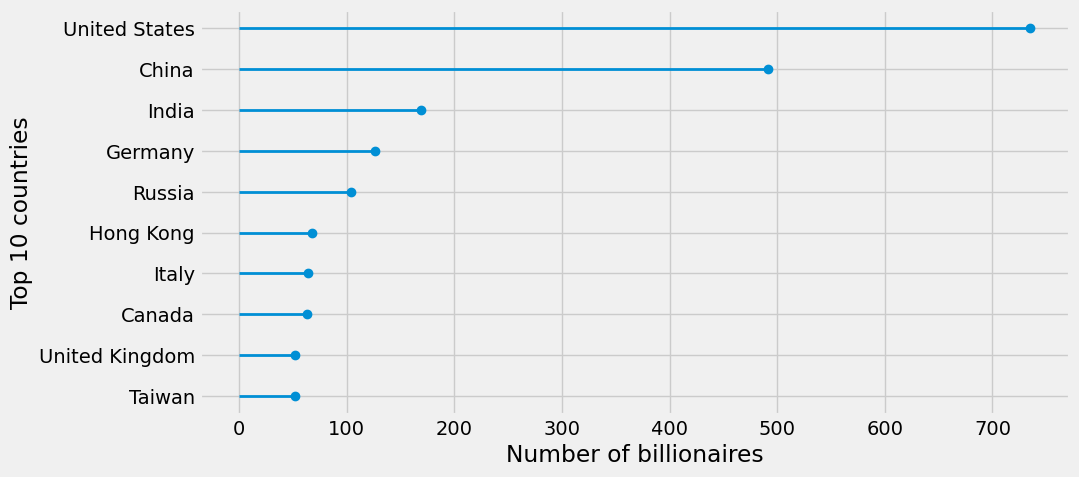

In [7]:
top10 =  countryCount.head(10)
my_range = range(len(top10.index)+1, 1, -1)


fig, ax = plt.subplots(figsize=(10,5))

plt.hlines(y=my_range, xmin=0, xmax=top10['rank'], linewidth=2.0)
plt.plot(top10['rank'], my_range, 'o')

plt.yticks(my_range, top10['countryOfCitizenship'])
plt.ylabel('Top 10 countries')
plt.xlabel('Number of billionaires')

## Billionaires by Gender

In [8]:
genderCount = data.groupby('gender')['rank'].count()
genderCount = genderCount.reset_index().sort_values('rank', ascending=False)

In [9]:
ratio = genderCount.loc[1, "rank"]/genderCount.loc[0, "rank"]

Text(0.5, 0, 'Number of billionaire by gender')

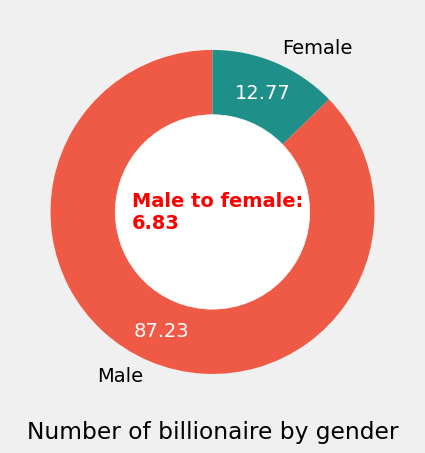

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#EE5A45', '#1E8F89']
# sns.set_palette(palette=colors)
_, _, auto_text = plt.pie(genderCount['rank'], labels=['Male', 'Female'], colors=colors, autopct='%.2f', 
        pctdistance=0.8, startangle=90)
for text in auto_text:
  text.set_color('white')
my_circle=plt.Circle((0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax.text(-0.5, -0.1, f'Male to female: \n{ratio:.2f}', color='red', fontweight='heavy')
plt.xlabel('Number of billionaire by gender')
# plt.xticks([0, 1], ['Male', 'Female'])

## Billionaires by self made status

In [11]:
originCount = data.groupby('selfMade')['rank'].count()
originCount = originCount.reset_index().sort_values('rank', ascending=False)

Text(0.5, 0, 'Origin')

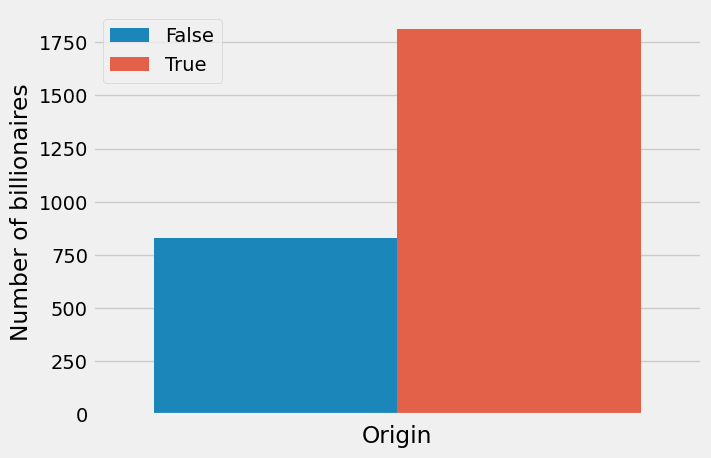

In [18]:
fig, axes = plt.subplots(figsize=(7,5))
sns.barplot(data=originCount, hue='selfMade', y='rank')
axes.legend()
plt.ylabel('Number of billionaires')
plt.xlabel('Origin')

## Billionaires by age

<Axes: xlabel='age', ylabel='Count'>

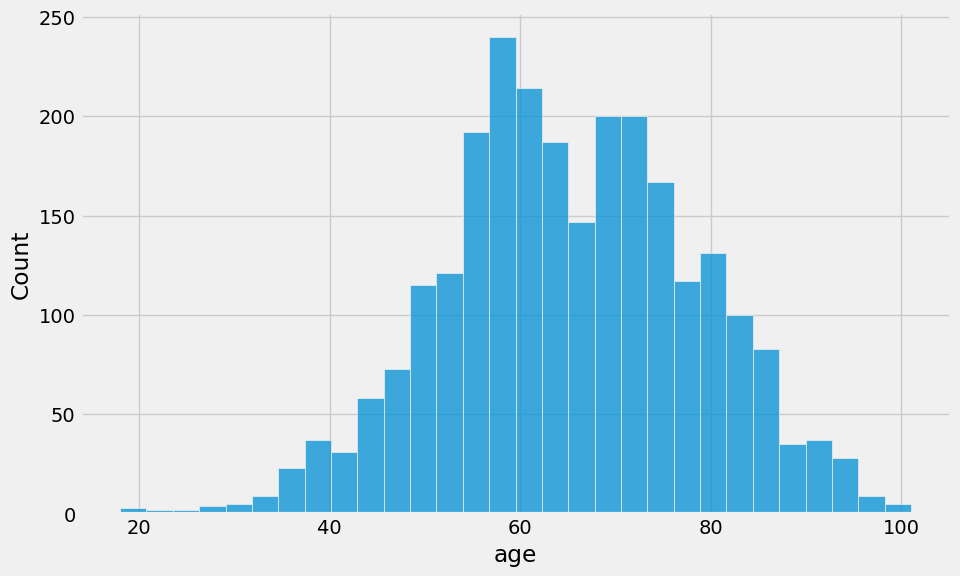

In [21]:
fig, axes = plt.subplots(figsize=(10, 6.18))
sns.histplot(data=data, x='age')

In [24]:
data.loc[data['age']==min(data['age'])]

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
823,818,3500,Fashion & Retail,Clemente Del Vecchio,18.0,Italy,Milan,Eyeglases,Fashion & Retail,Italy,NaN,False,N,M,5/6/2004 0:00,Del Vecchio,Clemente,NaN,4/4/2023 5:01,NaN,NaN,2004.0,5.0,6.0,110.62,0.6,"$2,001,244,392,042",61.9,101.9,82.9,24.3,59.1,60297396.0,41.87194,12.56738


In [25]:
data.loc[data['age']==max(data['age'])]

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
2180,2133,1300,Finance & Investments,George Joseph,101.0,United States,Los Angeles,Insurance,Finance & Investments,United States,NaN,True,D,M,9/11/1921 0:00,Joseph,George,NaN,4/4/2023 5:01,California,West,1921.0,9.0,11.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891


Text(0, 0.5, 'Number of Billionaires')

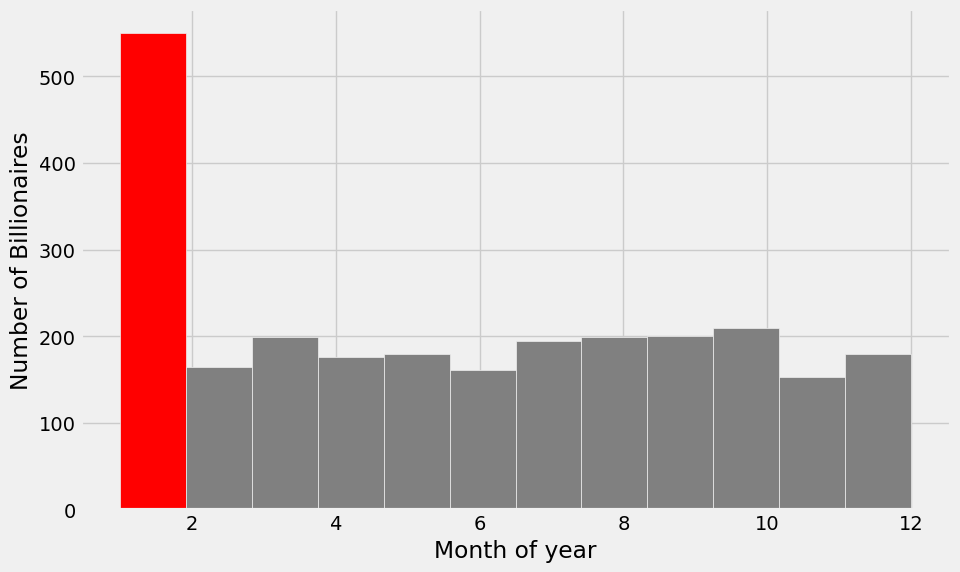

In [56]:
fig, axes = plt.subplots(figsize=(10, 6.18))
# color = ['orange' orange if 
ax = sns.histplot(data=data, x='birthMonth', bins=12, color='grey', alpha=1)
ax.patches[0].set_facecolor('red')
plt.xlabel('Month of year')
plt.ylabel('Number of Billionaires')

Text(0.5, 0, 'Day of month')

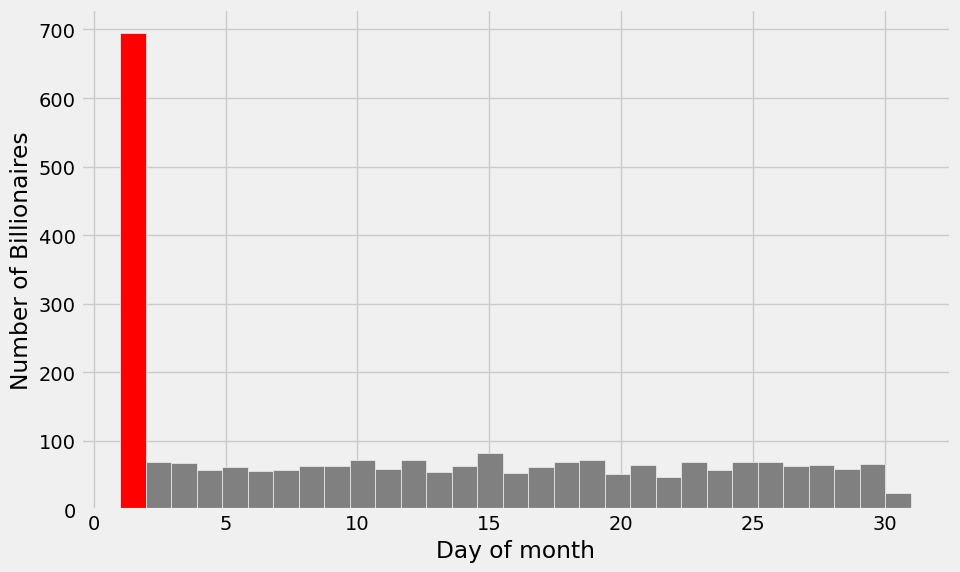

In [55]:
fig, axes = plt.subplots(figsize=(10, 6.18))
# color = ['orange' orange if 
ax = sns.histplot(data=data, x='birthDay', bins=31, color='grey', alpha=1)
ax.patches[0].set_facecolor('red')
plt.ylabel('Number of Billionaires')
plt.xlabel('Day of month')
plt.text(0, 650, 'A disproportionate amount of ')

In [54]:
data.loc[data['birthDay']==1]

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
14,15,68000,Food & Beverage,Zhong Shanshan,68.0,China,Hangzhou,"Beverages, pharmaceuticals",Food & Beverage,China,NaN,True,U,M,12/1/1954 0:00,Zhong,Shanshan,NaN,4/4/2023 5:01,NaN,NaN,1954.0,12.0,1.0,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
16,17,59000,Diversified,Charles Koch & family,87.0,United States,Wichita,Koch Industries,Diversified,United States,"Koch Industries, Inc.",False,D,M,11/1/1935 0:00,Koch,Charles,Chairman and CEO,4/4/2023 5:01,Kansas,Midwest,1935.0,11.0,1.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
25,26,45000,Technology,Zhang Yiming,39.0,China,Beijing,TikTok,Technology,China,ByteDance,True,D,M,1/1/1984 0:00,Zhang,Yiming,Founder,4/4/2023 5:01,NaN,NaN,1984.0,1.0,1.0,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
37,38,33400,Automotive,Robin Zeng,54.0,China,Ningde,Batteries,Automotive,Hong Kong,NaN,True,D,M,1/1/1969 0:00,Zeng,Robin,NaN,4/4/2023 5:01,NaN,NaN,1969.0,1.0,1.0,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
39,40,32100,Diversified,Len Blavatnik,65.0,United Kingdom,London,"Music, chemicals",Diversified,United States,NaN,True,D,M,6/1/1957 0:00,Blavatnik,Len,NaN,4/4/2023 5:01,NaN,NaN,1957.0,6.0,1.0,119.62,1.7,"$2,827,113,184,696",60.0,101.2,81.3,25.5,30.6,6.683440e+07,55.378051,-3.435973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,2540,1000,Fashion & Retail,Liu Baolin,69.0,China,Wuhan,Pharmacies,Fashion & Retail,China,NaN,True,E,M,6/1/1953 0:00,Liu,Baolin,NaN,4/4/2023 5:01,NaN,NaN,1953.0,6.0,1.0,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2624,2540,1000,Healthcare,Wan Feng & family,54.0,China,Shenzhen,Medical equipment,Healthcare,China,NaN,True,R,M,1/1/1969 0:00,Wan,Feng,NaN,4/4/2023 5:01,NaN,NaN,1969.0,1.0,1.0,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2631,2540,1000,Fashion & Retail,Xie Bingzheng & family,54.0,China,Guangzhou,Apparel,Fashion & Retail,China,NaN,True,N,M,1/1/1969 0:00,Xie,Bingzheng,NaN,4/4/2023 5:01,NaN,NaN,1969.0,1.0,1.0,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2634,2540,1000,Healthcare,Yi Xianzhong & family,63.0,China,Guangzhou,Pharmaceuticals,Healthcare,China,NaN,True,D,M,5/1/1959 0:00,Yi,Xianzhong,NaN,4/4/2023 5:01,NaN,NaN,1959.0,5.0,1.0,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


## Billionaires by industry

In [29]:
data.loc[data['category']!=data['industries']]

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country


In [30]:
industryCount = data.groupby('category')['rank'].count()
industryCount = industryCount.reset_index().sort_values('rank', ascending=False)

Text(0.5, 0, 'Number of billionaires')

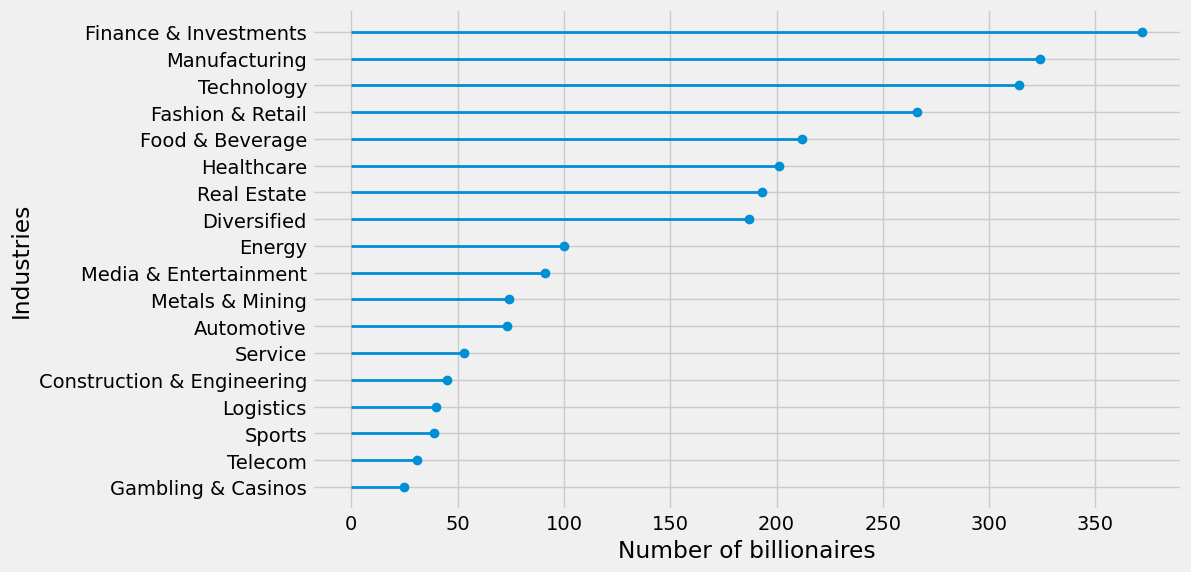

In [35]:
top10 =  industryCount
my_range = range(len(top10.index)+1, 1, -1)


fig, ax = plt.subplots(figsize=(10, 6.18))

plt.hlines(y=my_range, xmin=0, xmax=top10['rank'], linewidth=2.0)
plt.plot(top10['rank'], my_range, 'o')

plt.yticks(my_range, top10['category'])
plt.ylabel('Industries')
plt.xlabel('Number of billionaires')